<a href="https://colab.research.google.com/github/spctr01/Machine-learning/blob/master/evalution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evalution


# classification evaluation metrix

*   Accuracy
*   Area under ROC curve (ROC/AUC)
*   Confusion Metrix
*   Classification report






In [7]:
import numpy as np
import pandas as pd
data = pd.read_csv('heart-disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**1.Accuracy**

In [10]:
# 1. Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = data.drop('target', axis = 1)
Y = data['target']

model = RandomForestClassifier()
model.fit(X,Y)
clv =cross_val_score(model, X, Y, cv=5 )
print(clv)

np.mean(clv)

[0.80327869 0.90163934 0.78688525 0.83333333 0.8       ]


0.8250273224043717

**2.ROC CURVE**

In [70]:
# ROC area under receiver operative characterstic (ROC/AUC)
# roc = comparison of models true positive vs flase positive tpr vs fpr

# true_positive = predicted 1 for 1
# false positive = predicted 1 for 0
# true negative = predicted 0 for 0
# false negative = predicted 0 for 1

from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

#splitting data to train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

#fitting data to model
model.fit(x_train, y_train)

pred = model.predict_proba(x_test)
pred[:10]

array([[0.02, 0.98],
       [0.29, 0.71],
       [0.57, 0.43],
       [0.48, 0.52],
       [0.21, 0.79],
       [0.08, 0.92],
       [0.97, 0.03],
       [0.63, 0.37],
       [0.73, 0.27],
       [0.18, 0.82]])

In [58]:
# Roc curve is true+ vs false+ so take the second column of the predict probabelity (which is of 1) and exclude first
posetive = pred[:,1]

# predict roc curve tpr fpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, posetive)
tpr

array([0.        , 0.03030303, 0.09090909, 0.15151515, 0.18181818,
       0.24242424, 0.39393939, 0.45454545, 0.48484848, 0.54545455,
       0.60606061, 0.60606061, 0.66666667, 0.6969697 , 0.72727273,
       0.78787879, 0.78787879, 0.84848485, 0.87878788, 0.87878788,
       0.87878788, 0.90909091, 0.90909091, 0.96969697, 0.96969697,
       1.        , 1.        , 1.        ])

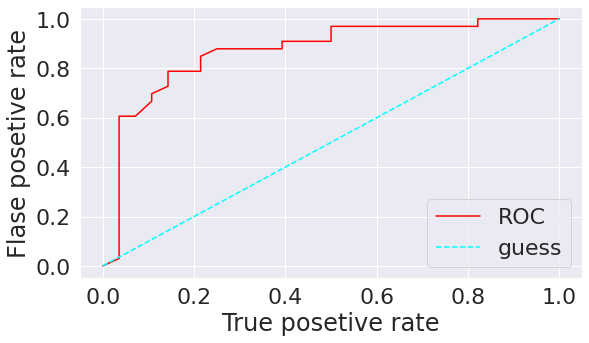

In [101]:
#visualise roc curve
import matplotlib.pyplot as plt

#create a function to plot a curve
def plot_roc(fpr, tpr):

  plt.figure(figsize=(9,5) )
  plt.plot(fpr, tpr, color= 'red', label='ROC')
  plt.plot([0,1], [0,1], color = 'cyan', linestyle = '--', label= 'guess')
  
  plt.xlabel('True posetive rate' )
  plt.ylabel('Flase posetive rate')


  plt.legend()
  plt.show()

plot_roc(fpr, tpr)

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, posetive)


0.8706709956709957

**3.CONFUSION METRIX**

In [103]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
conf_mat = confusion_matrix(y_test, pred)
conf_mat

array([[15,  2],
       [10, 34]])

Text(20.5, 0.5, 'Predicted')

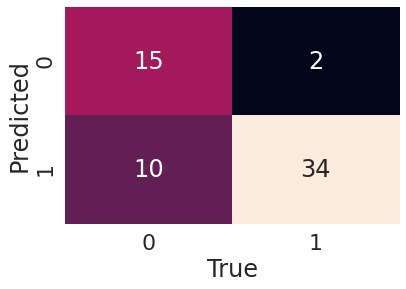

In [100]:
#visualise confusion matrix with seaborn heat map
import seaborn as sns
sns.set(font_scale = 2)
sns.heatmap(conf_mat, annot = True, cbar= False)
plt.xlabel('True')
plt.ylabel('Predicted')

**4.Classification Report**

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.60      0.88      0.71        17
           1       0.94      0.77      0.85        44

    accuracy                           0.80        61
   macro avg       0.77      0.83      0.78        61
weighted avg       0.85      0.80      0.81        61



# Evaluate Regression 


1.   R^2 (pronounced r-squared) / cofficient of determinant
2.   Mean absolute Error
3.   Mean Squared Error



In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [137]:
data = pd.DataFrame(boston['data'], columns= boston['feature_names'])
data['target'] = boston['target']

X = data.drop('target', axis = 1)
Y = data['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)


model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9054433196131438